## Class 3 - L1 and L2 regularization
In our this lecture, we discussed some foundational concepts in data science, namely *overfitting*, the *bias-variance* trade-off, and *regularization*.
Today, we will apply some of these concepts to interpret and improve the performance of our predictive models, focusing especially on regularization.

AS usual, we will do all of this using `scikit-learn`.

**Note**: As last week, under `nbs/class_03` you will find a notebook called `example.ipynb`, where I provide an example of how to run today's exercise on sample data.
Some of it repeats things done as part of `class_02`, for the sake of completeness.
But you can also:
- just keep working on the same notebook as last week
- work in a new notebook, but load data splits and models that have saved last week

### Today's exercise
Gather in the same group as last week, and please go through the following steps:
1. Look back at last week's notebook. If you have not applied any transformation to your input because you did not have time, spend some time thinking about whether it would make sense to do so. You can find relevant transformations in `scikit-learn`: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing. You will probably mostly be interested in `StandardScaler` and `MinMaxScaler`
2. Look at the performance of the models you've fitted last week: what is the best model? Do you see any evidence of overfitting?
3. Fit your maximal models with `Lasso` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) and `Ridge` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) estimators instead of `LinearRegression`. Make sure you look at the documentation to understand what these do. Fit multiple models with multiple values of alpha and store the outputs;
4. Plot the performance of your models against your linear and KNN models from last week. Does the performance of the model on the validation set improve with regularization?
5. For both `Lasso` and `Ridge` models, plot the value of the coefficients as a function of alpha. You can access the coefficients for a fitted `model` through `model.coef_`. What do you notice in terms of how LASSO versus Ridge behave? (Look at `example.ipynb` for inspiration)
6. Finally, if any models are doing better than the linear model without regularization, select the best `Ridge` and the best `Lasso` model, and plot their coefficients, alongsize coefficients from the simple linear models. How do estimates change with regularization? Which values have changed the most? Do you have any hypothesis as to why?

### Once you have done this
Please submit a pull request to my repository where, within `nbs/class_03/group-x` you have the notebook on which you have worked.
If your notebook is the same as last week, please push that one.

In [20]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle as pkl
import matplotlib.pyplot as plt

In [4]:
# load the data
data = pd.read_csv("../../data/class_01/bikes.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# creating the y and X for all models
y = np.array(data["cnt"])
# scale the y variable from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1,1)).reshape(-1)
X0 = np.ones(len(y)).reshape(-1,1)
X1 = np.array(data["instant"]).reshape(-1,1)
X2 = np.array(data[["temp", "windspeed", "season", "weekday"]])
X3 = np.array(data[["instant", "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]])

Xs = [X0, X1, X2, X3]

<Axes: ylabel='Count'>

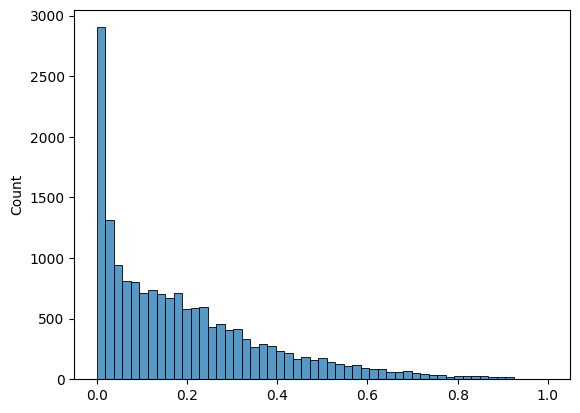

In [18]:
# plot standardized y
sns.histplot(y)

In [19]:
# split the data into train, test and val

# find the points that fit with where the data should be split to get 70/15/15
first_70 = int(len(data) * 0.70)
next_15 = int(len(data) * 0.15 + first_70)

# set empty lists
train_Xs = []
val_Xs = []
test_Xs = []

# fill the lists
for X in Xs:
    # get the train
    train = X[:first_70]
    train_Xs.append(train)

    # get the val
    val = X[first_70:next_15]
    val_Xs.append(val)

    # get the test
    test = X[next_15:]
    test_Xs.append(test)


y_train = y[:first_70]
y_val = y[first_70:next_15]
y_test = y[next_15:]

print(len(train_Xs[0]))
print(len(val_Xs[0]))
print(len(test_Xs[0]))

print(len(y_train))
print(len(y_val))
print(len(y_test))


12165
2606
2608
12165
2606
2608


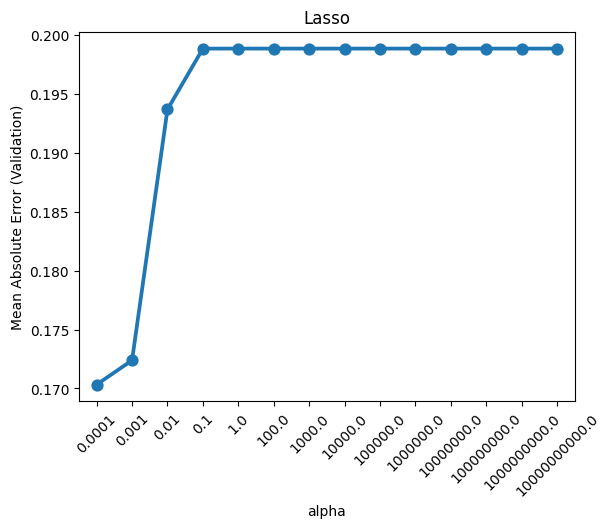

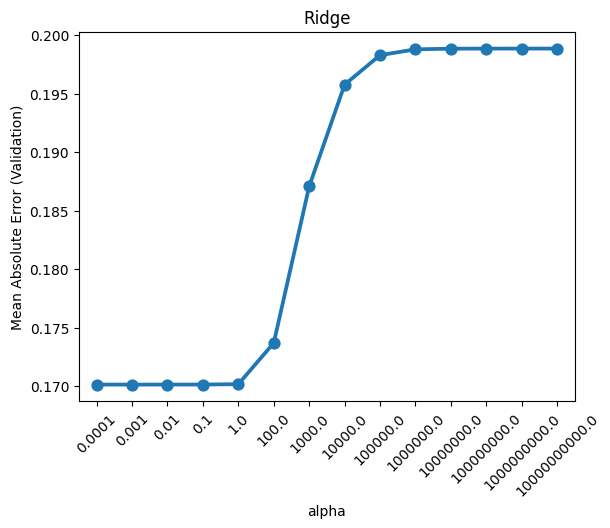

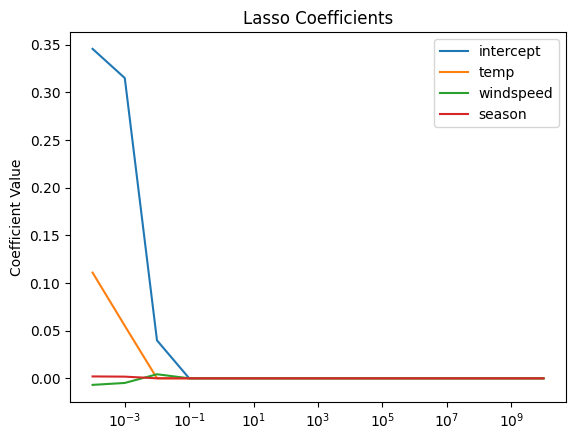

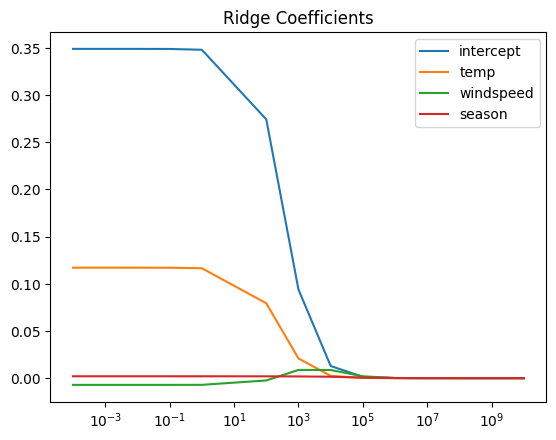

Lasso: min mae = 0.17033051963699133, min alpha = 0.0001
Ridge: min mae = 0.170131441501651, min alpha = 0.0001


In [42]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error

# try for 5 different alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 1, pow(10, 2), pow(10, 3), pow(10, 4), pow(10, 5), pow(10, 6), pow(10, 7), pow(10, 8), pow(10, 9), pow(10, 10)]

# now fit lasso
lasso_models = []
lasso_mae = []
lasso_coefs = []
for alpha in alphas:
    # create the model
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_Xs[2], y_train)
    lasso_models.append(lasso)
    # get the mae
    y_pred = lasso.predict(val_Xs[2])
    mae = mean_absolute_error(y_val, y_pred)
    lasso_mae.append(mae)
    # get the coefficients
    lasso_coefs.append(lasso.coef_)
    # save the model
    with open(f"../../models/class_03/lasso_{alpha}.pkl", "wb") as f:
        pkl.dump(lasso, f)

# now fit ridge
ridge_models = []
ridge_mae = []
ridge_coefs = []
for alpha in alphas:
    # create the model
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_Xs[2], y_train)
    ridge_models.append(ridge)
    # get the mae
    y_pred = ridge.predict(val_Xs[2])
    mae = mean_absolute_error(y_val, y_pred)
    ridge_mae.append(mae)
    # get the coefficients
    ridge_coefs.append(ridge.coef_)
    # save the model
    with open(f"../../models/class_03/ridge_{alpha}.pkl", "wb") as f:
        pkl.dump(ridge, f)

# point plot the results of the lasso and ridge, using seaborn
# alpha on x axis, mae on y axis
lasso_df = pd.DataFrame({"alpha": alphas, "mae": lasso_mae})
ridge_df = pd.DataFrame({"alpha": alphas, "mae": ridge_mae})

lasso_df
# plot the lasso
g = sns.pointplot(data=lasso_df, x="alpha", y="mae")
plt.xticks(rotation=45)
# set y axis label
plt.ylabel("Mean Absolute Error (Validation)")
plt.title("Lasso")
plt.show()

# plot the ridge
g = sns.pointplot(data=ridge_df, x="alpha", y="mae")
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error (Validation)")
plt.title("Ridge")
plt.show()

# plot the coefficients
lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)

# plot the lasso
plt.plot(alphas, lasso_coefs)
# add coefficient names
plt.legend(["intercept", "temp", "windspeed", "season", "weekday"])
plt.xscale("log")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients")
plt.show()

# plot the ridge
plt.plot(alphas, ridge_coefs)
# add coefficient names
plt.legend(["intercept", "temp", "windspeed", "season", "weekday"])
plt.xscale("log")
plt.title("Ridge Coefficients")
plt.show()


# print out min mae and alpha for lasso
min_mae = min(lasso_mae)
min_alpha = alphas[lasso_mae.index(min_mae)]
print(f"Lasso: min mae = {min_mae}, min alpha = {min_alpha}")

# print out min mae and alpha for ridge
min_mae = min(ridge_mae)
min_alpha = alphas[ridge_mae.index(min_mae)]
print(f"Ridge: min mae = {min_mae}, min alpha = {min_alpha}")



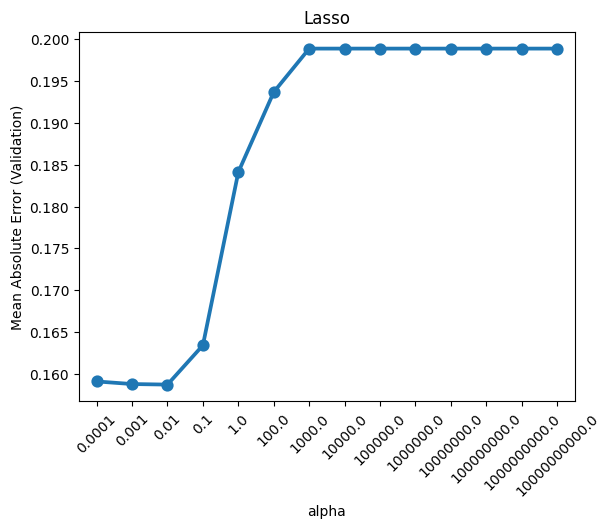

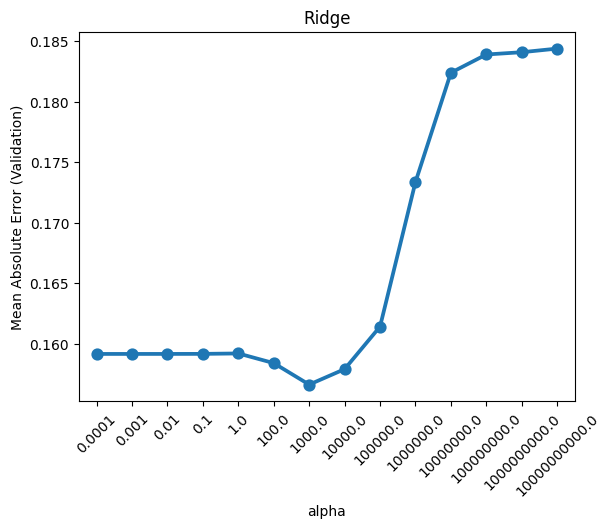

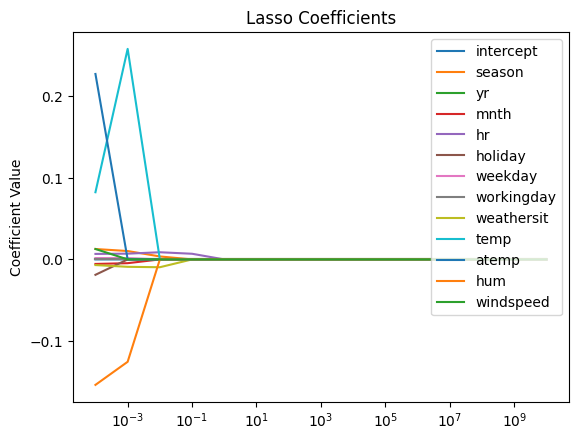

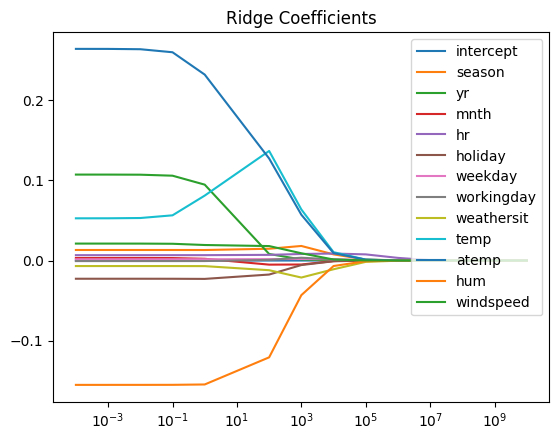

Lasso: min mae = 0.15875301270073394, min alpha = 0.01
Ridge: min mae = 0.15662980310588034, min alpha = 1000


In [44]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error

# try for 5 different alpha values
alphas = [0.0001, 0.001, 0.01, 0.1, 1, pow(10, 2), pow(10, 3), pow(10, 4), pow(10, 5), pow(10, 6), pow(10, 7), pow(10, 8), pow(10, 9), pow(10, 10)]

# now fit lasso
lasso_models = []
lasso_mae = []
lasso_coefs = []
for alpha in alphas:
    # create the model
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_Xs[3], y_train)
    lasso_models.append(lasso)
    # get the mae
    y_pred = lasso.predict(val_Xs[3])
    mae = mean_absolute_error(y_val, y_pred)
    lasso_mae.append(mae)
    # get the coefficients
    lasso_coefs.append(lasso.coef_)
    # save the model
    with open(f"../../models/class_03/lasso_{alpha}.pkl", "wb") as f:
        pkl.dump(lasso, f)

# now fit ridge
ridge_models = []
ridge_mae = []
ridge_coefs = []
for alpha in alphas:
    # create the model
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_Xs[3], y_train)
    ridge_models.append(ridge)
    # get the mae
    y_pred = ridge.predict(val_Xs[3])
    mae = mean_absolute_error(y_val, y_pred)
    ridge_mae.append(mae)
    # get the coefficients
    ridge_coefs.append(ridge.coef_)
    # save the model
    with open(f"../../models/class_03/ridge_{alpha}.pkl", "wb") as f:
        pkl.dump(ridge, f)

# point plot the results of the lasso and ridge, using seaborn
# alpha on x axis, mae on y axis
lasso_df = pd.DataFrame({"alpha": alphas, "mae": lasso_mae})
ridge_df = pd.DataFrame({"alpha": alphas, "mae": ridge_mae})

lasso_df
# plot the lasso
g = sns.pointplot(data=lasso_df, x="alpha", y="mae")
plt.xticks(rotation=45)
# set y axis label
plt.ylabel("Mean Absolute Error (Validation)")
plt.title("Lasso")
plt.show()

# plot the ridge
g = sns.pointplot(data=ridge_df, x="alpha", y="mae")
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error (Validation)")
plt.title("Ridge")
plt.show()

# plot the coefficients
lasso_coefs = np.array(lasso_coefs)
ridge_coefs = np.array(ridge_coefs)

# plot the lasso
plt.plot(alphas, lasso_coefs)
# add coefficient names
plt.legend(["intercept", "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"], loc="upper right")
plt.xscale("log")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients")
plt.show()

# plot the ridge
plt.plot(alphas, ridge_coefs)
# add coefficient names
plt.legend(["intercept", "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"], loc="upper right")
plt.xscale("log")
plt.title("Ridge Coefficients")
plt.show()


# print out min mae and alpha for lasso
min_mae = min(lasso_mae)
min_alpha = alphas[lasso_mae.index(min_mae)]
print(f"Lasso: min mae = {min_mae}, min alpha = {min_alpha}")

# print out min mae and alpha for ridge
min_mae = min(ridge_mae)
min_alpha = alphas[ridge_mae.index(min_mae)]
print(f"Ridge: min mae = {min_mae}, min alpha = {min_alpha}")


